<a href="https://colab.research.google.com/github/Szczureczek1983/Repozytorium2/blob/main/Reg_logistyczna_365.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regresja logistyczna

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [5]:
raw_data = pd.read_csv('/content/2.01.+Admittance.csv')

In [6]:
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [7]:
# konwersja dummies do 0 i 1
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [8]:
#określamy zmienne
y = data['Admitted']
x1 = data['SAT']

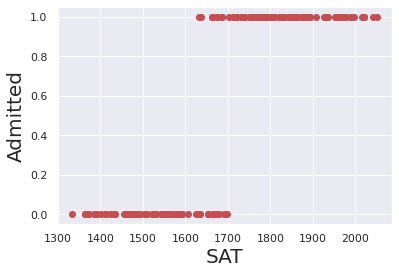

In [9]:
# robimy wykres nasych danych
plt.scatter(x1, y, color = 'r')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


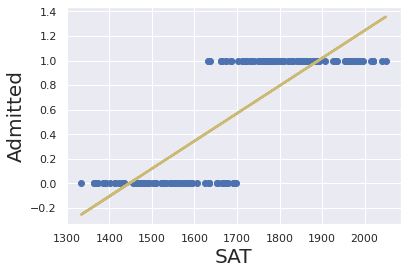

In [10]:
# kreślimy linię regresji
X = sm.add_constant(x1)
reg_lin = sm.OLS(y,X)
results_lin = reg_lin.fit()
plt.scatter(x1, y, color = 'C0')
y_hat = x1*results_lin.params[1]+results_lin.params[0]
plt.plot(x1, y_hat, lw = 2.5, color = 'C8')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()



Regresja linowa nie jest w stanie dobrze sfitować omawianych wyników. 
Nasze dane mają nieliniowy charakter, dlatego nalezy podejść do nich w sposób nieliniowy. 

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


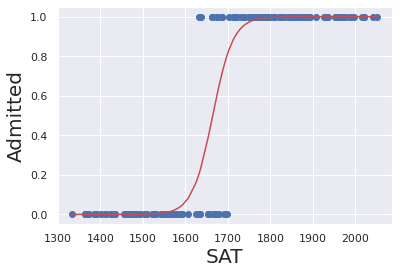

In [11]:
reg_log = sm.Logit(y,X)
res_log = reg_log.fit()

def f(X, b0, b1):
  return np.array(np.exp(b0+X*b1)/(1+np.exp(b0+X*b1)))
f_sorted = np.sort(f(x1, res_log.params[0], res_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y, color = 'C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted, f_sorted, color = 'r')
plt.show()

this function shows the probability of addmision, given an SAT score.
When the SAT score is relatively low, the probability of getting admitted is 0
When the SAT score is relatively high, the prob of getting admitted is 1. 
Wynik w przedziale 1600 - 1750 jest niejasny/niepewny


In [12]:
# Tworzymy model regresji logistycznej
X = sm.add_constant(x1)
reg_log = sm.Logit(y,X)
res_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


SM wykorzystuje algorytmy ML do fitowania regresji
0.13.. - value of the 'objective function' at the 10th iteration.

In [13]:
res_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sun, 24 Jul 2022   Pseudo R-squ.:                  0.7992
Time:                        16:20:00   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

MLE - Maximum likelihood estimation.
Likelihood function:
a function which estimates how likely it is that the model at hand describes the real underlying relationship of the variables. The bigger the likelihood function, the higher the probability that our model is correct.

MLE tries to maximize the likelihood function. 
the computer is going through different values, until if finds a model, for which the likelihood is the highest. When it can no longer improve it, it will just stop the optimization.

log-likelihood is almost but not always negative. The bigger it is the better. 

LL-Null (Log Likelihood-null): the log-likelihood of a model which has no independent variables. y=b0*1

LLR (Log Likelihood Ratio): measures if our model is statistically different from LL-null, a.k.a. a useless model (it means the same as p-value in linear regresion)  

Pseudo R-squ.(McFadden's R-squared): a good Pseudo R-squared is somewhere between 0.2 and 0.4. Is good for compering variations of the same model.
Different models will have competely different and incomparable Pseudo R-squares.

Logit model
SAT - Admittance regression
log(pi/(1-pi)) = -69.91 + 0.042*SAT

pi -> probability of an event occuring
1-pi -> probability of the event NOT occuring

interpretation of coeficients:

log(odds2) = -69.91 + 0.042*SAT2
log(odds1) = -69.91 + 0.042*SAT1
log(odds2) - log(odds1) = 0.042(SAT2 - SAT1)
log(odds2/odds1) = 0.042(SAT2 - SAT1)

Difference of 1 unit of SAT:
log(odds2/odds1) = 0.042
exp(log(odds2/odds1)) = e(0.042)
odds2/odds1 = 1.042
odds2 = 1.042*odds1
odds2 = 104.2% * odds1
('Odds2' are 4.2% higher than 'Odds1')
When the SAT score inreases by 1, the odds of admittance increase by 4.2%

delta(odds) = exp(bk)

Difference of 10 units of SAT:
log(odds2/odds1) = 0.042*10
odds2 = 152%*odds1
The odds increase by 52%



In [14]:
# Binary Predictors in Logistic regression

In [15]:
raw_data=pd.read_csv('/content/2.02.+Binary+predictors.csv')
raw_data.head()

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [17]:
# przypisujemy do danych kategorycznych wartości 0 i 1
# 'Male' is the baseline or the reference group
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data['Gender'] = data['Gender'].map({'Female': 1, 'Male': 0})
data.head()

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0


In [18]:
#deklaarujemy zmienne zależna i niezależną
y= data['Admitted']
x1 = data['Gender']

In [19]:
# tworzymy model regresji
X = sm.add_constant(x1)
reg_log = sm.Logit(y, X)
res_log = reg_log.fit()
res_log.summary()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sun, 24 Jul 2022   Pseudo R-squ.:                  0.1659
Time:                        16:28:27   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender         2.0786      0.363      5.727      0.000       1.367       2.790
==============================================================================
"""

Interpretacja tabeli:

log(odds) = -0.64 + 2.08*Gender

Log(odds2) = -0.64 + 2.08*Gender2 (female)
Log(odds1) = -0.64 +2.08*Gender1 (male)

log(odds2/odds1) =2.08(Gender2 - Gender1)
log(odds2/odds1) = 2.08*(1-0)

odds(female) = 7.99*odds(male)

In [22]:
y= data['Admitted']
x1 = data[['SAT','Gender']]
X = sm.add_constant(x1)
reg_log = sm.Logit(y, X)
res_log = reg_log.fit()
res_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Sun, 24 Jul 2022   Pseudo R-squ.:                  0.8249
Time:                        16:37:53   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [23]:
np.exp(1.9449)

6.992932526814459

Interpretacja:
Given the same SAT score, a female has 7 times higher odds to get admitted.

Calculating the accuracy of the Model
sm.LogitRasults.predict() returns the values predicted by our model

In [24]:
np.set_printoptions(formatter = {'float': lambda x: "{0:0.2f}".format(x)})
res_log.predict()
#otrzymujemy tablicę prawdopodobieństw

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [25]:
#otrzymane wyniki można zaokręglić do zera (odds<0.5) lub 1 (odds>0.5)
# możemy porównać otrzymane predykcje z wynikami wejściwymi
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

Interpretacja:
If 80% of predicted values coincide with the actual values, we say the model has 80% accuracy.

sm.LogitResults.pred_table() - returns a table which compare predicted and actual values

In [27]:
res_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [28]:
# Tworzymy Confusion Matrix
cm_df = pd.DataFrame(res_log.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index = {0: 'Actual 0', 1: ' Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


Confusion matrix - shows how confused our model is
- For 69 observations the model predicted 0 and the true value was 0
- For 90 observations the model predicted 1 and the true value was 1
- For 4 obserrvations the model predicted 0 while the true value was 1
- for 5 observations the model predicted 1 while the true value was 0

Overall the model made an accurate prediction in 159 (69+90) out of 168 cases
159/168 = 0.946 = 94.6% accuracy

In [29]:
# liczymy accuracy dla tablicy cm
cm = np.array(cm_df)
acc_train = (cm[0,0] + cm[1,1])/cm.sum()
acc_train

0.9464285714285714

Underfitting and Overfitting:
- Underfitting: the model has not captured the underlying logic of the data. Low train  and Low test accuracy
- Overfitting: our training has focused on the particular training set so much, it has 'missed the point'. High train  but Low test accuracy

In [30]:
# Testujemy model
test = pd.read_csv('/content/2.03.+Test+dataset.csv')
test.head()

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male


In [31]:
test['Admitted'] = test['Admitted'].map({'Yes': 1, 'No': 0})
test['Gender'] = test['Gender'].map({'Female': 1, 'Male': 0})
test.head()

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0


In [ ]:
#1 we will use our model to make predictions based on the test data
#2 we will compare those with the actual outcome
#3 calculate the accuracy
#4 create a confusion matrix



In [32]:
X # Order is very important, because the coefficients of the reg will expect it

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0
...,...,...,...
163,1.0,1722,1
164,1.0,1750,0
165,1.0,1555,0
166,1.0,1524,0


In [33]:
test_actual = test['Admitted']
test_data = test.drop(['Admitted'], axis = 1)
test_data = sm.add_constant(test_data)
test_data.head()
# dzięki temu uzyskaliśmy takie samo uporządkowanie jak w danych wejściowych

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0


In [34]:
# musimy napisać funkcję tworzenia Confusion Matrix dla naszych danych testowych, gdyż SM nie ma takiej opcji

def confusion_matrix(data,actual_values,model):
  pred_values = model.predict(data)
  bins = np.array([0,0.5,1])
  cm = np.histogram2d(actual_values, pred_values, bins = bins)[0]
  accuracy = (cm[0,0]+cm[1,1])/cm.sum()
  return cm, accuracy

In [35]:
cm = confusion_matrix(test_data, test_actual, res_log)
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]), 0.8947368421052632)

The test accuracy is the figure we use when we refer to overall accuracy of the regression.
Almost always the training accuracy is higher than the test accuracy - problem of the overfitting 

In [37]:
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index = {0: 'Actual 0', 1: ' Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


The opposite of accuracy is missclassification rate (MR)

MR = # missclasyfied/# all elements



In [38]:
print('Missclassification rate: ' +str((1+1)/19))

Missclassification rate: 0.10526315789473684
